In [9]:
#!/usr/bin/python
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
batch_siz = 128

2.1.0


In [2]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    'G://desktop/githubcode&VS_code/tf_emotion_detector/train',
    target_size=(48,48),
    class_mode='categorical'
)

Found 35887 images belonging to 7 classes.


In [3]:

model = tf.keras.models.Sequential()
       
model.add(tf.keras.layers.Conv2D(32, (1, 1), strides=1, padding='same', input_shape=(48, 48, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7))
model.add(tf.keras.layers.Activation('softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(
    train_generator,
    steps_per_epoch=800/(batch_siz/32),
    nb_epoch=70,
    validation_data=None,
    verbose=1
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0

200/200 [==============================] - 77s 384ms/step - loss: 0.8992 - accuracy: 0.6706
Epoch 50/70
200/200 [==============================] - 76s 382ms/step - loss: 0.8474 - accuracy: 0.6850
Epoch 51/70
200/200 [==============================] - 76s 382ms/step - loss: 0.8322 - accuracy: 0.6947
Epoch 52/70
200/200 [==============================] - 77s 386ms/step - loss: 0.8231 - accuracy: 0.6969
Epoch 53/70
200/200 [==============================] - 76s 378ms/step - loss: 0.8437 - accuracy: 0.6905
Epoch 54/70
200/200 [==============================] - 76s 381ms/step - loss: 0.8084 - accuracy: 0.7047
Epoch 55/70
200/200 [==============================] - 75s 375ms/step - loss: 0.7723 - accuracy: 0.7269
Epoch 56/70
200/200 [==============================] - 75s 377ms/step - loss: 0.7802 - accuracy: 0.7105
Epoch 57/70
200/200 [==============================] - 78s 389ms/step - loss: 0.7471 - accuracy: 0.7316
Epoch 58/70
200/200 [==============================] - 75s 377ms/step - loss

In [11]:
history.history

{'loss': [1.8359158313274384,
  1.814549869298935,
  1.7890091908682146,
  1.7621746724843979,
  1.7152134901285172,
  1.6515033453702928,
  1.6083966386318207,
  1.5649064469337464,
  1.5293879133462907,
  1.5054639381170274,
  1.4671652120351792,
  1.4306181252002717,
  1.4163032013177872,
  1.3954838943481445,
  1.3638178339600564,
  1.3470807257294655,
  1.3226495310664177,
  1.3090145766837795,
  1.2961143562197686,
  1.2599876436591149,
  1.269330579340458,
  1.2666417056322097,
  1.2401222243905068,
  1.200758530497551,
  1.2066255646944046,
  1.185588092505932,
  1.15192966401577,
  1.1793237139807773,
  1.1285718390509456,
  1.1150306710600852,
  1.1019534340500832,
  1.0660010587080284,
  1.0936903408169747,
  1.0636955471821719,
  1.0681750604510307,
  1.0183132380247115,
  1.0310420143604277,
  1.006579942825015,
  1.03192145511508,
  0.9940489549934864,
  0.9747378930449486,
  0.9792165589332581,
  0.9765969230234623,
  0.9339743432402611,
  0.9040533041954041,
  0.8937821

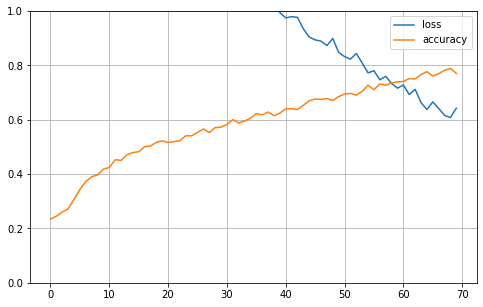

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)